# Ejercicio 1: Predicción de streams de canciones de Spotify. | Regresión Lineal

Julieta Melina Flores Morán

### **Descripción**:
Utiliza un dataset que incluye datos sobre las canciones más populares de 2023 para predecir
el número total de streams acumulados en Spotify.
De: https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023

### **Pasos**:

- Limpia los datos (eliminar duplicados, valores faltantes, normalizar, transformar variables categoricas, etc)
- Analiza las variables más influyentes en los streams.
- Entrena un modelo de regresión lineal para predecir el stream de las canciones.
- Evalúa el modelo con métricas como RMSE.
- Presenta los resultados con gráficos y presenta tu análisis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

In [2]:
!pip install ipywidgets --upgrade

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nelgiriyewithana/top-spotify-songs-2023")
path += "/spotify-2023.csv"
print("Path to dataset files:", path)

Path to dataset files: /home/julietanilem/.cache/kagglehub/datasets/nelgiriyewithana/top-spotify-songs-2023/versions/1/spotify-2023.csv


In [4]:
data = pd.read_csv(path, encoding='latin-1', encoding_errors='replace')
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


## Limpiar datos

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [6]:
data.shape

(953, 24)

In [7]:
# elimina duplicados
data.drop_duplicates(inplace=True)

In [8]:
# Analisamos las caracteristicas de los dos tipos de columnas
numericas = data.select_dtypes(include=['number'])

categoricas = data.select_dtypes(include=['object'])

In [9]:
numericas.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [10]:
categoricas.describe()

,track_name,artist(s)_name,streams,in_deezer_playlists,in_shazam_charts,key,mode
count,953,953,953,953,903,858,953
unique,943,645,949,348,198,11,2
top,Daylight,Taylor Swift,723894473,0,0,C#,Major
freq,2,34,2,24,344,120,550


In [11]:
# Analisamos los valores faltantes
print(data.isnull().sum())
print("============= porcentaje de datos nulos============")
(data.isnull().sum() / len(data)) * 100

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64
============= porcentaje de datos nulos============


track_name              0.00000
artist(s)_name          0.00000
artist_count            0.00000
released_year           0.00000
released_month          0.00000
released_day            0.00000
in_spotify_playlists    0.00000
in_spotify_charts       0.00000
streams                 0.00000
in_apple_playlists      0.00000
in_apple_charts         0.00000
in_deezer_playlists     0.00000
in_deezer_charts        0.00000
in_shazam_charts        5.24659
bpm                     0.00000
key                     9.96852
mode                    0.00000
danceability_%          0.00000
valence_%               0.00000
energy_%                0.00000
acousticness_%          0.00000
instrumentalness_%      0.00000
liveness_%              0.00000
speechiness_%           0.00000
dtype: float64

In [12]:
categoricas

,track_name,artist(s)_name,streams,in_deezer_playlists,in_shazam_charts,key,mode
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",141381703,45,826,B,Major
1,LALA,Myke Towers,133716286,58,382,C#,Major
2,vampire,Olivia Rodrigo,140003974,91,949,F,Major
3,Cruel Summer,Taylor Swift,800840817,125,548,A,Major
4,WHERE SHE GOES,Bad Bunny,303236322,87,425,A,Minor
...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,91473363,37,0,A,Major
949,Bigger Than The Whole Sky,Taylor Swift,121871870,8,0,F#,Major
950,A Veces (feat. Feid),"Feid, Paulo Londra",73513683,7,0,C#,Major
951,En La De Ella,"Feid, Sech, Jhayco",133895612,17,0,C#,Major


Notamos que las columnas ```streams```, ```in_deezer_playlist``` y ```in_shazam_charts``` son columnas categoricas que deben ser numericas ya que representan cantidades. ```in_shazam_charts``` es la única columna de estas que tiene valores nulos, como sabemos que son valores positivos los remplazaré temporalmente por -1 para sustituirlos posteriormente por la media de la columna.

In [13]:
def filasANumericas(col):
    data[col] = data[col].fillna('-1').astype(str) # valores nulos son -1
    no_num = data[~data[col].str.replace(',', '', regex=True).str.match(r'^-?\d+$')] # quitar comas y espacios y seleccionar las que no se componen solo de digitos
    print(no_num[[col]]) #columnas que no se pueden castear a numericas
    data.drop(index=no_num.index, inplace=True) # eliminamos el registro ya que un dato no númerico no es correcto en esta columna
    data[col] = pd.to_numeric(data[col].str.replace(',', '', regex=True)) # pasamos los datos a números

In [14]:
filasANumericas('streams')

                                               streams
574  BPM110KeyAModeMajorDanceability53Valence75Ener...


In [15]:
filasANumericas('in_deezer_playlists')

Empty DataFrame
Columns: [in_deezer_playlists]
Index: []


In [16]:
filasANumericas('in_shazam_charts')

Empty DataFrame
Columns: [in_shazam_charts]
Index: []


In [17]:
# comprobamos que las columnas tienen el tipo de dato correcto
data.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                  int64
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists      int64
in_deezer_charts         int64
in_shazam_charts         int64
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [18]:
# podemos imputar la media de in_shazam_charts  para los valores con -1 (nulos)
# Calcular la media excluyendo los valores -1 y luego en esos lugares ponemos la media
media = data.loc[data['in_shazam_charts'] != -1, 'in_shazam_charts'].mean()
data['in_shazam_charts'] = data['in_shazam_charts'].replace(-1, media)

In [19]:
# La otra columna con valores faltantes es en key imputamos el valor mas común de la columna
valor_mas_comun = data['key'].mode()[0]
data['key'] = data['key'].fillna(valor_mas_comun)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            952 non-null    object 
 1   artist(s)_name        952 non-null    object 
 2   artist_count          952 non-null    int64  
 3   released_year         952 non-null    int64  
 4   released_month        952 non-null    int64  
 5   released_day          952 non-null    int64  
 6   in_spotify_playlists  952 non-null    int64  
 7   in_spotify_charts     952 non-null    int64  
 8   streams               952 non-null    int64  
 9   in_apple_playlists    952 non-null    int64  
 10  in_apple_charts       952 non-null    int64  
 11  in_deezer_playlists   952 non-null    int64  
 12  in_deezer_charts      952 non-null    int64  
 13  in_shazam_charts      952 non-null    float64
 14  bpm                   952 non-null    int64  
 15  key                   952 no

In [21]:
# Restablecemos las columnas categoricas y numericas 
numericas = data.select_dtypes(include=['number'])

categoricas = data.select_dtypes(include=['object'])

In [22]:
categoricas.describe()

,track_name,artist(s)_name,key,mode
count,952,952,952,952
unique,942,644,11,2
top,Take My Breath,Taylor Swift,C#,Major
freq,2,34,215,549


In [23]:
data['mode'].unique()

array(['Major', 'Minor'], dtype=object)

In [24]:
# mode solo tiene dos valores diferentes por lo que podemos optar por  binary encoding
data['mode'] = data['mode'].map({'Minor': 0, 'Major': 1})

In [25]:
# centrarnos en el artista principal
data['artist'] = data['artist(s)_name'].apply(lambda x: x.split(',')[0].strip())

label_encoder = LabelEncoder()
data['artist'] = label_encoder.fit_transform(data['artist'])

# ya no usaremos artists_nam
data.drop(columns=['artist(s)_name'], inplace=True)


In [26]:
# para key optaremos por label encoding
data['key'] = label_encoder.fit_transform(data['key'])

In [27]:
# no nos es util el nombre de la cancion 
data.drop(columns=['track_name'], inplace=True)


In [28]:
data.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,artist
count,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,9.520000e+02,952.000000,952.000000,952.000000,...,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000
mean,1.556723,2018.288866,6.038866,13.944328,5202.565126,12.022059,5.141374e+08,67.866597,51.963235,385.535714,...,4.943277,0.576681,66.984244,51.406513,64.274160,27.078782,1.582983,18.214286,10.138655,222.780462
std,0.893331,11.011397,3.564571,9.197223,7901.400683,19.582405,5.668569e+08,86.470591,50.628850,1131.078760,...,3.129678,0.494345,14.631282,23.480526,16.558517,26.001599,8.414064,13.718374,9.915399,131.994261
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,23.000000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000,0.000000
25%,1.000000,2020.000000,3.000000,6.000000,874.500000,0.000000,1.416362e+08,13.000000,7.000000,13.000000,...,3.000000,0.000000,57.000000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000,109.000000
50%,1.000000,2022.000000,6.000000,13.000000,2216.500000,3.000000,2.905309e+08,34.000000,38.500000,44.000000,...,4.000000,1.000000,69.000000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000,207.000000
75%,2.000000,2022.000000,9.000000,22.000000,5573.750000,16.000000,6.738690e+08,88.000000,87.000000,164.250000,...,8.000000,1.000000,78.000000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000,350.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,12367.000000,...,10.000000,1.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000,457.000000


In [29]:
# para normalizar elegimos dos formas
cols = ["in_spotify_playlists", "in_spotify_charts", "streams", 
               "in_apple_playlists", "in_apple_charts", "in_deezer_playlists",
               "instrumentalness_%", "speechiness_%"]
scaler_robust = RobustScaler()
data[cols] = scaler_robust.fit_transform(data[cols])

In [30]:
cols= ["artist_count", "released_year", "released_month", "released_day",
               "danceability_%", "valence_%", "energy_%", "acousticness_%", 
               "liveness_%"]

scaler_minmax = MinMaxScaler()
data[cols] = scaler_minmax.fit_transform(data[cols])


In [31]:
data.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,artist
count,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,...,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000
mean,0.079532,0.949343,0.458079,0.431478,0.635434,0.563879,0.420129,0.451555,0.168290,2.258087,...,4.943277,0.576681,0.602524,0.509747,0.628115,0.279163,1.582983,0.161854,0.591236,222.780462
std,0.127619,0.118402,0.324052,0.306574,1.681417,1.223900,1.065054,1.152941,0.632861,7.478207,...,3.129678,0.494345,0.200429,0.252479,0.188165,0.268058,8.414064,0.145940,1.416486,131.994261
min,0.000000,0.000000,0.000000,0.000000,-0.465074,-0.187500,-0.545867,-0.453333,-0.481250,-0.290909,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.571429,0.000000
25%,0.000000,0.967742,0.181818,0.166667,-0.285577,-0.187500,-0.279755,-0.280000,-0.393750,-0.204959,...,3.000000,0.000000,0.465753,0.301075,0.500000,0.061856,0.000000,0.074468,-0.285714,109.000000
50%,0.000000,0.989247,0.454545,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,0.630137,0.505376,0.647727,0.185567,0.000000,0.095745,0.000000,207.000000
75%,0.142857,0.989247,0.727273,0.700000,0.714423,0.812500,0.720245,0.720000,0.606250,0.795041,...,8.000000,1.000000,0.753425,0.709677,0.772727,0.443299,0.000000,0.223404,0.714286,350.000000
max,1.000000,1.000000,1.000000,1.000000,10.785019,9.000000,6.413291,8.506667,2.956250,81.474380,...,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,91.000000,1.000000,8.285714,457.000000


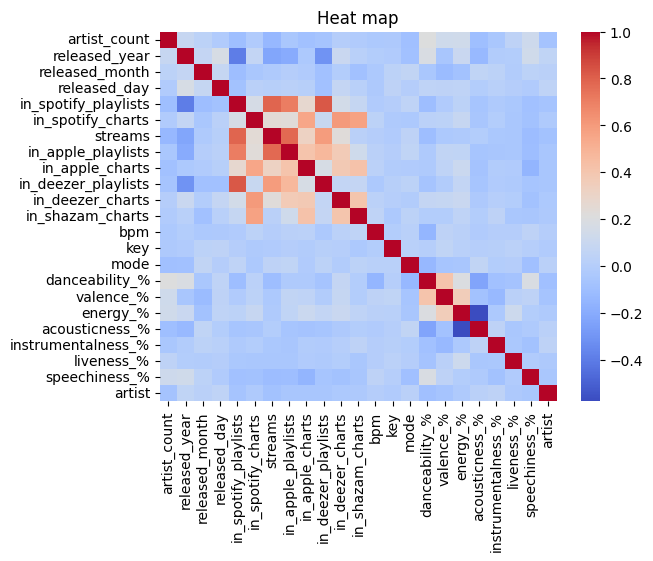

In [32]:
matrix = data.corr()
sns.heatmap(matrix, annot=False, cmap='coolwarm')
plt.title("Heat map")
plt.show()

In [33]:
# usaremos solo las variables con mas correlacion con streams que es lo que queremos predecir
#corr_streams = matrix['streams'].sort_values()
#poca_corr = corr_streams[abs(corr_streams) < 0.1]
#print(len(poca_corr))
#poca_corr

In [36]:
data

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,artist
0,0.142857,1.000000,0.545455,0.433333,-0.353993,9.0000,-0.280233,0.120000,2.80625,0.006612,...,2,1,0.780822,0.913978,0.840909,0.319588,0.0,0.053191,-0.285714,211
1,0.000000,1.000000,0.181818,0.733333,-0.158004,2.8125,-0.294635,0.186667,1.09375,0.092562,...,3,1,0.657534,0.612903,0.738636,0.072165,0.0,0.074468,-0.285714,276
2,0.000000,1.000000,0.454545,0.966667,-0.174390,6.8750,-0.282822,0.800000,2.10625,0.310744,...,7,1,0.383562,0.301075,0.500000,0.175258,0.0,0.297872,0.000000,299
3,0.000000,0.956989,0.636364,0.733333,1.200511,6.0625,0.958809,1.093333,2.10625,0.535537,...,0,1,0.438356,0.580645,0.715909,0.113402,0.0,0.085106,1.285714,395
4,0.000000,1.000000,0.363636,0.566667,0.195031,2.9375,0.023872,0.666667,1.18125,0.284298,...,0,0,0.575342,0.204301,0.806818,0.144330,63.0,0.085106,0.000000,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,0.000000,0.989247,0.909091,0.066667,-0.268873,-0.1875,-0.374005,0.360000,-0.31875,-0.046281,...,0,1,0.506849,0.215054,0.340909,0.587629,0.0,0.053191,-0.428571,360
949,0.000000,0.989247,0.818182,0.666667,-0.220567,-0.1875,-0.316890,-0.400000,-0.48125,-0.238017,...,8,1,0.260274,0.032258,0.170455,0.855670,1.0,0.095745,0.000000,395
950,0.142857,0.989247,0.909091,0.066667,-0.349737,-0.1875,-0.407749,-0.426667,-0.48125,-0.244628,...,3,1,0.780822,0.827957,0.659091,0.041237,0.0,0.053191,0.000000,119
951,0.285714,0.989247,0.818182,0.633333,-0.190775,-0.1875,-0.294298,-0.066667,-0.15625,-0.178512,...,3,1,0.808219,0.677419,0.772727,0.082474,0.0,0.095745,-0.142857,119


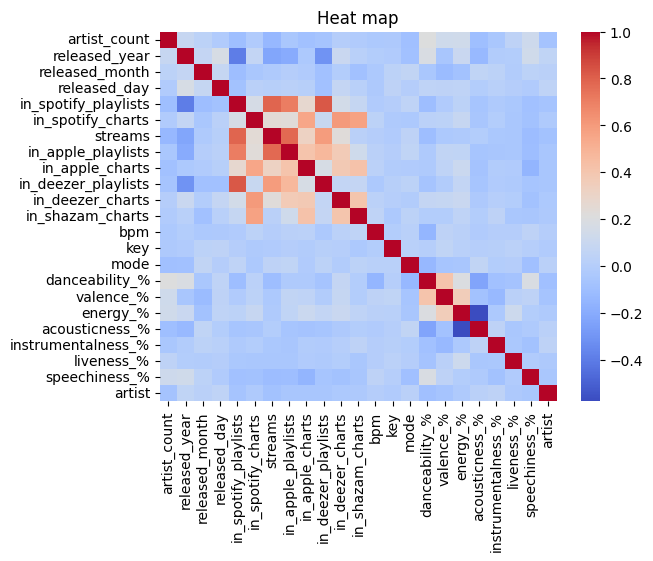

In [37]:
matrix = data.corr()
sns.heatmap(matrix, annot=False, cmap='coolwarm')
plt.title("Heat map")
plt.show()

### Modelo

In [38]:
X, Y = data.drop('streams', axis=1), data['streams'] # el objetivo es streams

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [40]:
model = LinearRegression()

In [41]:
model.fit(X_train, y_train)

LinearRegression()

In [42]:
y_pred = model.predict(X_test)

## Evaluacion

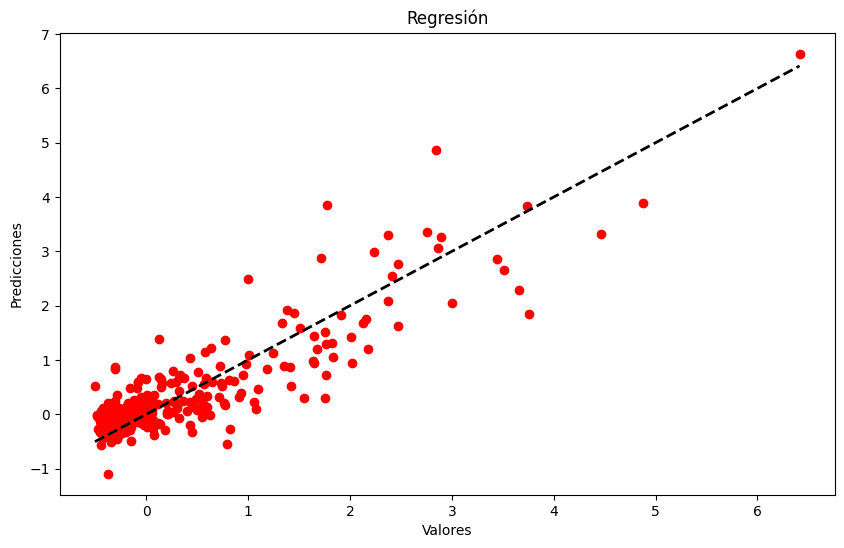

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores')
plt.ylabel('Predicciones')
plt.title('Regresión')
plt.show()

In [44]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('R^2: ', r2)

MSE:  0.2418540392228805
R^2:  0.7731660955972455


Conclusión

El modelo presenta un buen rendimiento, con un R² que sugiere un buen ajuste a los datos. Sin embargo, el MSE es un valor considerable, lo que indica que, aunque las características utilizadas son adecuadas para capturar el comportamiento de los streams, aún existe margen para mejorar la precisión de las predicciones.